# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [6]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [7]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [8]:
# Set the API base URL

base_url = "https://api.openweathermap.org/data/2.5/weather?"
units = "metric"


# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{base_url}appid={weather_api_key}&units={units}&q={city}"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass


# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | jamestown
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | puerto natales
Processing Record 4 of Set 1 | port douglas
Processing Record 5 of Set 1 | utrik
Processing Record 6 of Set 1 | stanley
Processing Record 7 of Set 1 | georgetown
Processing Record 8 of Set 1 | ushuaia
Processing Record 9 of Set 1 | heroica caborca
Processing Record 10 of Set 1 | taiohae
City not found. Skipping...
Processing Record 11 of Set 1 | yellowknife
Processing Record 12 of Set 1 | port-aux-francais
Processing Record 13 of Set 1 | iqaluit
Processing Record 14 of Set 1 | medina
Processing Record 15 of Set 1 | menongue
Processing Record 16 of Set 1 | acarau
Processing Record 17 of Set 1 | kashmar
Processing Record 18 of Set 1 | hawaiian paradise park
Processing Record 19 of Set 1 | puerto ayora
Processing Record 20 of Set 1 | grytviken
Processing Record 21 of Set 1 | camapua
Processing Record

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          590
Lat           590
Lng           590
Max Temp      590
Humidity      590
Cloudiness    590
Wind Speed    590
Country       590
Date          590
dtype: int64

In [10]:
# Display sample data
len(city_data_df)

590

In [11]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [12]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                      
0             jamestown  42.0970  -79.2353     15.01        91         100   
1         blackmans bay -43.0167  147.3167     10.29        87          78   
2        puerto natales -51.7236  -72.4875     10.25        53           0   
3          port douglas -16.4833  145.4667     24.86        85         100   
4                 utrik  11.2278  169.8474     26.68        80          99   

         Wind Speed Country        Date  
City_ID                                  
0              3.60      US  1712770682  
1              3.88      AU  1712770971  
2              7.72      CL  1712770944  
3              3.24      AU  1712770971  
4             10.40      MH  1712770866

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

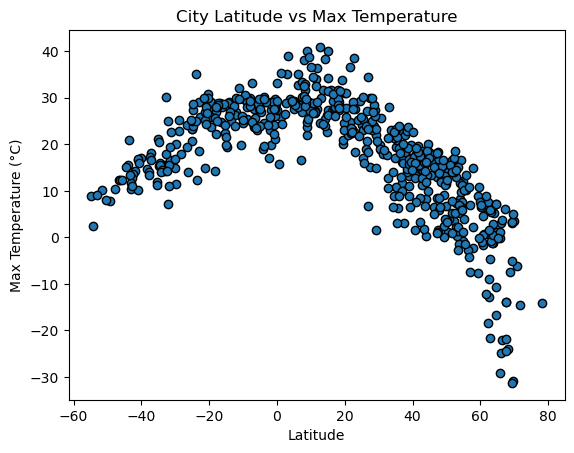

In [13]:
# Build scatter plot for latitude vs. temperature

plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.title("City Latitude vs Max Temperature")

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

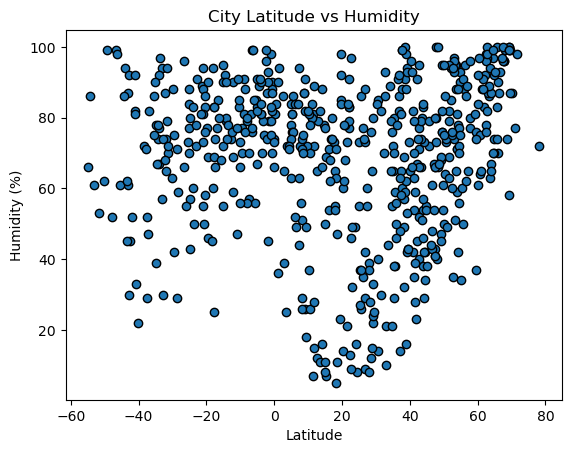

In [14]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs Humidity")

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

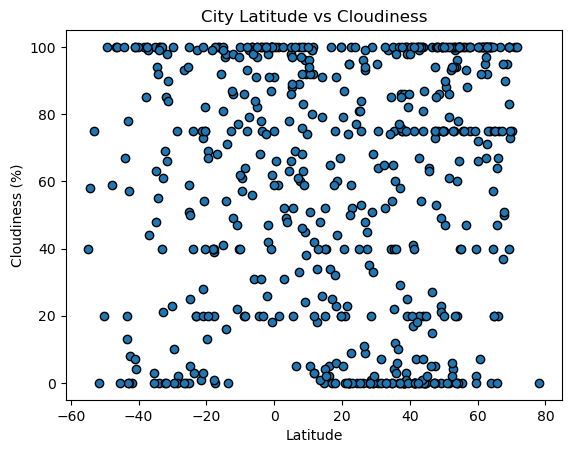

In [15]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude vs Cloudiness")

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

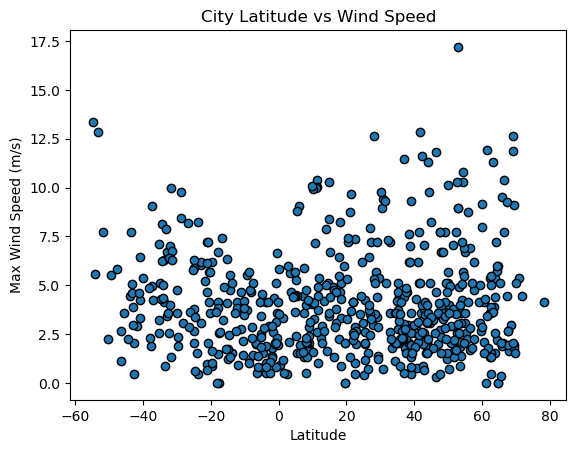

In [16]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], edgecolors = 'black')

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Wind Speed (m/s)")
plt.title("City Latitude vs Wind Speed")

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [71]:
# Define a function to create Linear Regression plots
from scipy.stats import linregress
def linear_regression(df, x_axis, y_axis): 
    
    #obtain x and y values from the dataframe
    x_values = df[x_axis]
    y_values = df[y_axis]

    #Perform Linear Regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    #line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    line_eq = f'y = {str(round(slope,2))}x + {str(round(intercept,2))}'
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #annotate the equation on the graph. The 'xycoords' portion sourced from ChatGPT
    plt.annotate(line_eq, (0.1, 0.9), xycoords='axes fraction', fontsize=15, color="red") 
    plt.title(("{} vs. {}").format(y_axis, x_axis))
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    print(f"The r-value is: {rvalue}")
    print(f"The equation of the regression line is: {line_eq}")

    # Save the figure
    #plt.savefig("figures/ScatterWeightTumorVolRegression.png")

In [22]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]
# Display sample data
northern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                       
0              jamestown  42.0970  -79.2353     15.01        91         100   
4                  utrik  11.2278  169.8474     26.68        80          99   
5                stanley  54.8680   -1.6985     12.01        90          40   
6             georgetown   5.4112  100.3354     28.30        86          20   
8        heroica caborca  30.7167 -112.1500     25.62        14           0   

         Wind Speed Country        Date  
City_ID                                  
0              3.60      US  1712770682  
4             10.40      MH  1712770866  
5              6.69      GB  1712770972  
6              1.54      MY  1712770946  
8              0.72      MX  1712770680

In [24]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
# YOUR CODE HERE
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]
# Display sample data
southern_hemi_df.head()

City      Lat       Lng  Max Temp  Humidity  Cloudiness  \
City_ID                                                                         
1            blackmans bay -43.0167  147.3167     10.29        87          78   
2           puerto natales -51.7236  -72.4875     10.25        53           0   
3             port douglas -16.4833  145.4667     24.86        85         100   
7                  ushuaia -54.8000  -68.3000      8.79        66          40   
10       port-aux-francais -49.3500   70.2167      7.75        99         100   

         Wind Speed Country        Date  
City_ID                                  
1              3.88      AU  1712770971  
2              7.72      CL  1712770944  
3              3.24      AU  1712770971  
7             13.38      AR  1712770972  
10             5.55      TF  1712770836

###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8521375806981466
The equation of the regression line is: y = -0.58x + 36.8


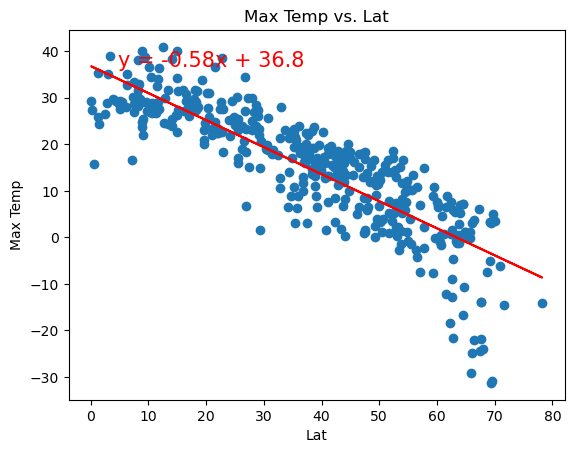

In [72]:
# Linear regression on Northern Hemisphere
linear_regression(northern_hemi_df,"Lat","Max Temp")
plt.show()

The r-value is: 0.769037991203645
The equation of the regression line is: y = 0.36x + 29.76


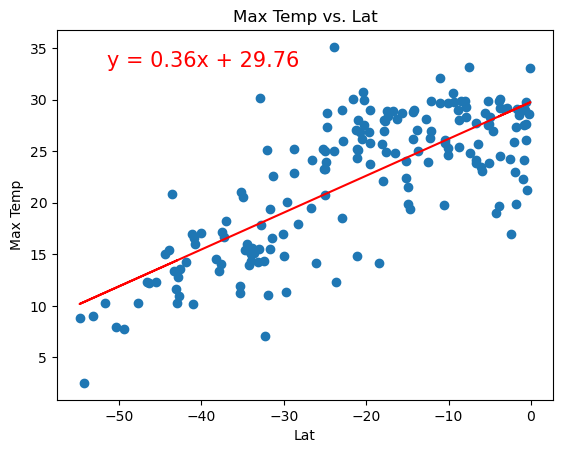

In [73]:
# Linear regression on Southern Hemisphere
linear_regression(southern_hemi_df,"Lat","Max Temp")
plt.show()

**Discussion about the linear relationship:** for cities in the northern hemisphere, there is an inverse relationship between max temp and latitude; as the latitude increases with movement away from the equator, there is a clear drop in maximum temperature. The maximum temperature at 0 degrees latitude is 36.8 degrees C, which is the Y intecept as seen in the equation (y = -.58x +36.8). For cities in the southern hemisphere, there is a positive relationship between max temp and latitude; as the latitude decreases with movement away from the equator, there is a clear drop in maximum temperature. Based on the equation (y = 0.36x + 29.76, a max temperature of 0 would occur at a latitude of -82.67, which is the South Pole)

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3138722409991985
The equation of the regression line is: y = 0.39x + 51.47


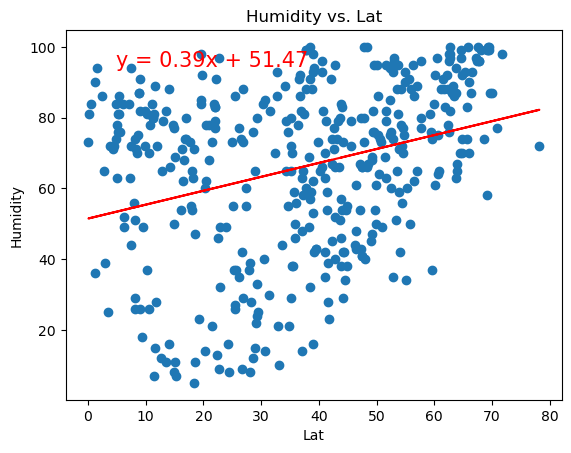

In [74]:
# Northern Hemisphere
linear_regression(northern_hemi_df,"Lat","Humidity")
plt.show()

The r-value is: 0.2556181127272937
The equation of the regression line is: y = 0.3x + 80.12


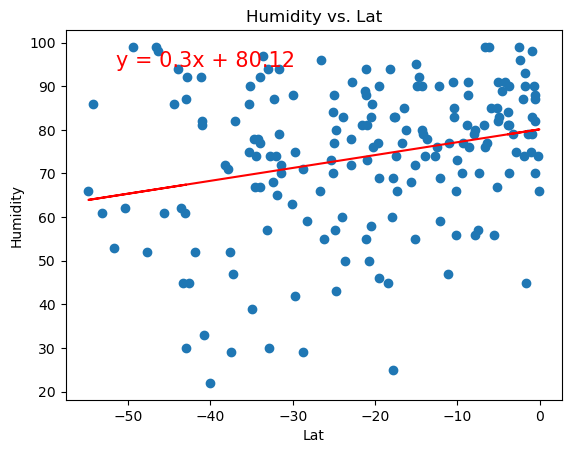

In [75]:
# Southern Hemisphere
linear_regression(southern_hemi_df,"Lat","Humidity")
plt.show()

**Discussion about the linear relationship:** There is a positive relationship between latitude and humidity in the southern hemisphere. As the latitudes increase towards the equator (0 deg), the humidity increases. The humidity at zero degress latitude would be around 80.12. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.1297618776579093
The equation of the regression line is: y = 0.26x + 46.86


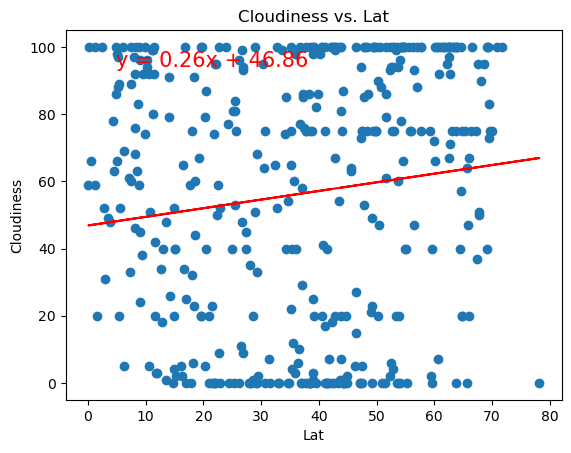

In [76]:
# Northern Hemisphere
linear_regression(northern_hemi_df,"Lat","Cloudiness")
plt.show()

The r-value is: 0.22405618440363165
The equation of the regression line is: y = 0.56x + 72.53


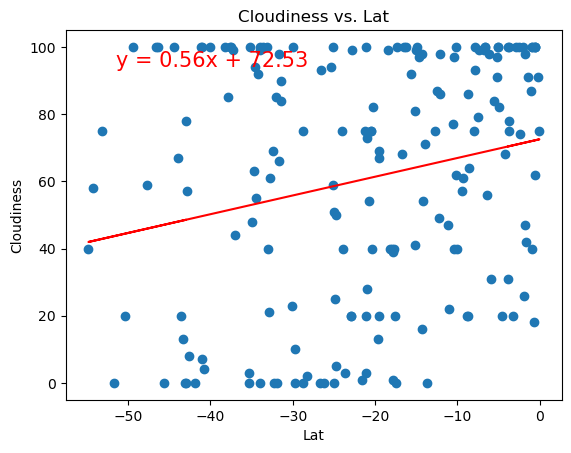

In [77]:
# Southern Hemisphere
linear_regression(southern_hemi_df,"Lat","Cloudiness")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.04925549022134384
The equation of the regression line is: y = 0.01x + 3.86


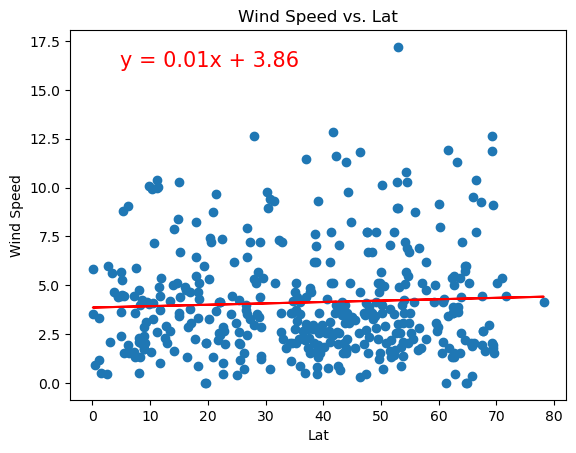

In [79]:
# Northern Hemisphere
linear_regression(northern_hemi_df,"Lat","Wind Speed")
plt.show()

The r-value is: -0.40140468586115396
The equation of the regression line is: y = -0.07x + 2.42


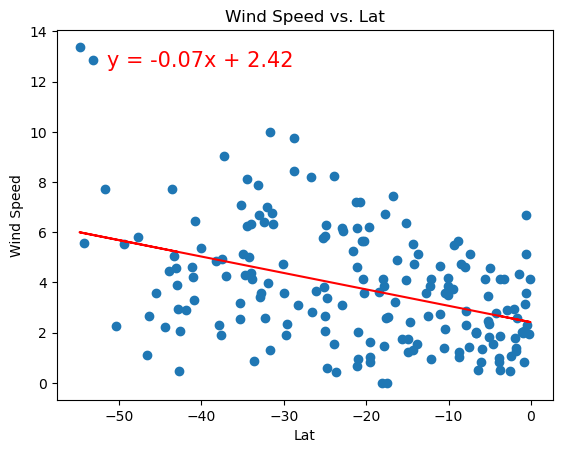

In [80]:
# Southern Hemisphere
linear_regression(southern_hemi_df,"Lat","Wind Speed")
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE